# ANN 인공신경망 구현

In [1]:
import torch
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import torch.nn.functional as F

생물학적 신경 세포는 인접한 신경세포로 자극을 전달하기 전, 입력받은 자극에 여러 화학적 처리를 가한다. 이와 비슷하게 인공신경망은 입력층으로 신호를 받아 은닉층을 지나 출력층으로 전달된다.
이때 매개변수인 가중치에 행렬곱시키고 편향을 더해주어 수학 연산을 실행한다.
가중치는 입력신호가 신호에 출력에 주는 여향을 계산하는 매개변수이고, 편향은 각 노드가 얼마나 데이터에 민감한지 알려주는 매개변수이다.
이 행렬곱의 결과는 활성화 함수를 거쳐 출력층으로 연결된다. 활성화 함수는 입력신호의 합이 활성화를 일으키는지 아닌지를 정하는 역할을 한다.
결과값과 정답을 비교하여 오차를 계산하고 이 오차를 기반으로 가중치를 뒤에서 부터 차례대로 경사하강법을 활용하여 변경 시킨다. 
이렇게 겹겹이 쌓인 가중치를 뒤에서 부터 차례대로 조정하고 최적화하는 알고리즘을 역전파라고 한다.

아래에서는 간단한 인공지능 모델을 Pytorch 를 이용하여 구현하는 방법을 다룬다.

In [2]:
n_dim = 2 
#make_blob() 함수는 예제용 데이터셋을 만들어주는 함수로 실행때마다 랜덤한 데이터셋을 생성한다.
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [3]:
# 아래의 함수의 역할은 레이블을 변경해준다. 

def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [4]:
y_train = label_map(y_train, [0,1],0)
y_train = label_map(y_train, [2,3],1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

In [5]:
# 데이터 시각화 함수
def vis_data(x,y=None,c='r'):
    if y is None:
        y= [None]*len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor = 'none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1],  c+'o' if y_==0 else c+'+')

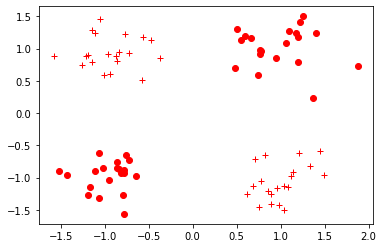

In [6]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [7]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [8]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # 모델 층 구성 정의
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) # 입력층, 은닉층 연결
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size,1) # 은닉층 출력 연결
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1) # 입력 층 이후 ReLU 연산
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2) # 은닉 층과 출력층 이후 activation sigmoid 연산
        
        return output

In [9]:
model = NeuralNet(2,5) 
learning_rate = 0.03
criterion = torch.nn.BCELoss() #Binary Cross Entropy 를 뜻함

In [10]:
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate) # optimizer 설정

In [11]:
#학습 이전 오차 
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test) 
print('Before Training, test loss is {}'.format(test_loss_before.item())) 

Before Training, test loss is 0.7518996000289917


In [12]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() # 경사값 초기화
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch%100==0:
        print('train loss at {} is {}'.format(epoch, train_loss.item()))
        
    train_loss.backward() # 역전파
    optimizer.step()

train loss at 0 is 0.74812251329422
train loss at 100 is 0.6420758962631226
train loss at 200 is 0.570119321346283
train loss at 300 is 0.475761741399765
train loss at 400 is 0.36479997634887695
train loss at 500 is 0.2549900412559509
train loss at 600 is 0.1733483225107193
train loss at 700 is 0.1219056025147438
train loss at 800 is 0.09019182622432709
train loss at 900 is 0.06982238590717316
train loss at 1000 is 0.0560687854886055
train loss at 1100 is 0.04635481908917427
train loss at 1200 is 0.03922347351908684
train loss at 1300 is 0.033817026764154434
train loss at 1400 is 0.02963530644774437
train loss at 1500 is 0.02632465958595276
train loss at 1600 is 0.023629602044820786
train loss at 1700 is 0.02139904722571373
train loss at 1800 is 0.019525514915585518
train loss at 1900 is 0.01793241687119007


In [13]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss_before.item())) 

After Training, test loss is 0.009544003754854202


In [14]:
torch.save(model.state_dict(), './ANN.pt') #model.pt 형태로 파일 저장
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.5817, -1.3395],
        [-1.2866,  1.5612],
        [ 1.7158,  1.6176],
        [-1.3690, -1.3705],
        [-0.0735, -0.1284]])), ('linear_1.bias', tensor([ 0.1319,  0.2192, -0.1339,  0.0150, -0.3354])), ('linear_2.weight', tensor([[ 1.8549,  1.8871, -2.2239, -1.8328, -0.2781]])), ('linear_2.bias', tensor([-0.0701]))])


In [15]:
# 모델 불러오기
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./ANN.pt'))

<All keys matched successfully>

In [16]:
new_model.eval()
print('벡터 [-1, 1] 이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1] 이 레이블 1을 가질 확률은 0.9966411590576172
